In [2]:
import cv2
import matplotlib.pyplot as plt

Here we are going to capture a video from the camera in a laptop or desktop
VideoCapture(0) -> it will say that capture from the default camera 
if default is doing someother work we can change this to VIdeoCpature(1) which states to use the extended camers

In [3]:
#displatying a video
cap = cv2.VideoCapture(0)
while(True):
    ret,frame = cap.read()
    grey = cv2.cvtColor(frame,0)
    cv2.imshow('frame',grey)
    if cv2.waitKey(0) & 0xFF == ord('e'):
        break
        

cap.release()
cv2.destroyAllWindows()

Above cell will capture a video and convert to gray frame. It will exit if we press 'e' key on keyboard

Next we are going to save the video caputured from the camera in local file system

In [ ]:
#saving a video file in windows and retreiving it in the opencv
#play only in the laptop will update how to stop video in notebook
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc,20.0,(720,1080))
while(True):
    ret,frame = cap.read()  #returns whether it is a frame or not if frame returns the frame 
    im = cv2.cvtColor(frame,0) 
    cv2.imshow("image",im)
    out.write(im)
    if 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Next we are going to change or do operations on the image captured as video is also a collection of frames. Video is recorded as 30fps meaning 30 frames per second so we get 30 images per sond recording. Instead we do on a particular image

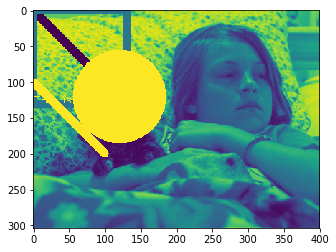

In [4]:
#iamge operations
img = cv2.imread(r'C:\Users\jatoth.kumar\Desktop\imgdata\Cat\6.jpg',0)
import numpy as np
cv2.line(img,(0,0),(120,120),(0,0,0),thickness=10)   #drawing a line
cv2.rectangle(img,(0,0),(130,130),(100,100,100),thickness=10)   #a rectangle
cv2.circle(img,(120,120),5,(255,255,255),120)  #a circle
pts = np.array([[100,200],[0,100]])  
cv2.polylines(img,[pts],True,color=(255,255,255),thickness=10) #give points as array
font = cv2.FONT_HERSHEY_PLAIN   #give the font type
cv2.putText(img,'This is helloworld',(0,130),font,fontScale=1,color=(255,255,255),thickness=1) #place the text wanted
cv2.imshow('image',img)
plt.imshow(img)
plt.plot()
cv2.waitKey(0)
cv2.destroyAllWindows()


As we can see there is a circle rectange and line drawn in the image and converted to grey scale. So there are multiple operations possible for a image using Opencv2

We can change the pixels of the image directly to another colour. As shown below we have changed the entures pixels into 255. 

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


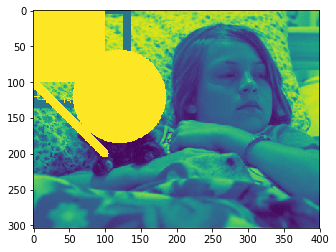

In [8]:
px = img[20,20]
# print(px)
img[20,20] = 0
# print(img[20,20])
#change for a region
img[0:100,0:100] = [255]
print(img[0:100,0:100])
cv2.imshow('image',img)
plt.imshow(img)
plt.plot()
cv2.waitKey(0)
cv2.destroyAllWindows()

As you can see the colour is changed to yellow in the regions if we view with opencv we will get white colour in those regions

We can add two images but the two images should be of same size so we convert both the images to a same shape of 500 size and then add these two images

(375, 500)
(500, 500) (500, 500)


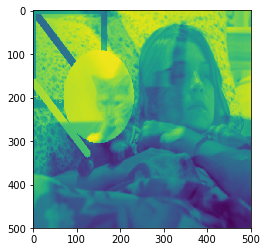

In [5]:
#adding two images of similar size if not there will be a error popping out
img2 = cv2.imread(r'C:\Users\jatoth.kumar\Desktop\imgdata\Cat\0.jpg',0)
resize = 500
print(img2.shape)
x = cv2.resize(img2,(resize,resize))  #reshaping both the images
y = cv2.resize(img,(resize,resize))
print(x.shape,y.shape)
# z = cv2.add(x,y)   #here we get mostly white color as the pixel size >255 will be treated as white so we do some normalization in below image
z = cv2.addWeighted(x,0.5,y,0.5,0)
#another type of filter
# th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow('image',z)
plt.imshow(z)
plt.plot()
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#loading a video and get those regions which are red in color
x = cv2.VideoCapture(0) #capture the video
while(1):
    _,y = x.read()   #reading the captured video
    hsv = cv2.cvtColor(y,cv2.COLOR_BGR2HSV)  #converting each frame into HSV format which will be accurate to each pixel
    red_lower = np.array([20,150,50])  #giving the values of the red
    upp_red = np.array([255,255,180])
    mask = cv2.inRange(hsv,red_lower,upp_red) #if in range convert to white else convert to black
    res = cv2.bitwise_and(y,y,mask=mask)  # masking the frame with the mask to get the actual red region
    median = cv2.medianBlur(res,15)  #refining the blur region on the resultant frame
    cv2.imshow('image',y)  
    cv2.imshow('image1',mask)
    cv2.imshow('image2',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()


In [ ]:
#detecting edges
x = cv2.VideoCapture(0)
while(1):
    _,y = x.read()
    hsv = cv2.cvtColor(y,cv2.COLOR_BGR2HSV)
    red_lower = np.array([20,150,50])
    upp_red = np.array([255,255,180])
    mask = cv2.inRange(hsv,red_lower,upp_red)
    res = cv2.bitwise_and(y,y,mask=mask)
    median = cv2.medianBlur(res,15)
    # cv2.imshow('image',y)
    # cv2.imshow('image1',mask)
    # cv2.imshow('image2',res)

    kernal = np.ones((5,5),np.uint8)
    #these erosion and dilate will detect the image coloured and non-coloured regions
    erosion = cv2.erode(mask,kernal,iterations=1)
    dilute = cv2.dilate(mask,kernal,iterations=1)
    laplacian = cv2.Laplacian(y,cv2.CV_64F)
    x1 = cv2.Sobel(y,cv2.CV_64F,1,0,ksize=5)
    y1 = cv2.Sobel(y,cv2.CV_64F,0,1,ksize=5)
    edge = cv2.Canny(y,100,200)   #as name says it detects the pure edges

    cv2.imshow('frame',y)
    cv2.imshow('erosion',erosion)
    cv2.imshow('dilute',dilute)
    cv2.imshow("x",x1)
    cv2.imshow("y",y1)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    cv2.imshow("edge",edge)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()


-1

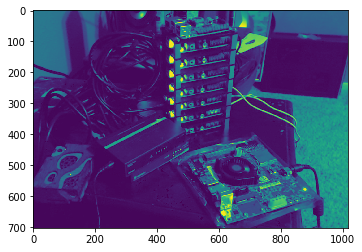

In [5]:
#detecting a image segment in a whole image template matching in a whole image
import numpy as np
img = cv2.imread(r'C:\Users\jatoth.kumar\Desktop\opencv-template-matching-python-tutorial.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
template = cv2.imread(r'C:\Users\jatoth.kumar\Desktop\opencv-template-for-matching.jpg',0)
cv2.imshow('image',img_gray)
cv2.imshow('template',template)
plt.imshow(img_gray)
plt.plot()
cv2.waitKey(0)

[]

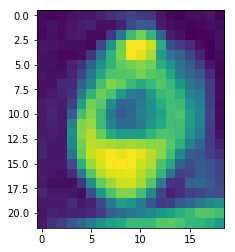

In [6]:
plt.imshow(template)
plt.plot()

In [7]:
w,h = template.shape[::-1]
template.shape[::-1]

(19, 22)

-1

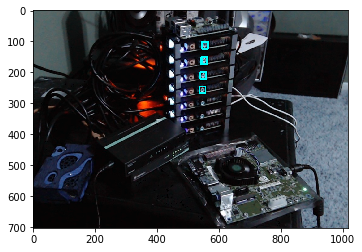

In [9]:
#detecting a match with the template
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
#     print(pt)
    cv2.rectangle(img,pt,(pt[0]+w,pt[1]+h),(0,255,255),4)
cv2.imshow('Detected',img)
plt.imshow(img)
plt.plot()
cv2.waitKey(0)


Here we are going to see the type of image classification